# Confidence

In [1]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [2]:
path = r"/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/data/"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
colors = []*0

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.png'):
          # adds only the image files to the flowers list
            colors.append(file.name)
            
len(colors)

8190

In [3]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [4]:
p = r"/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/color_features.pkl"
test_data = {}


import tqdm

# ctr = 1
# loop through each image in the dataset
for color in colors:
    # try to extract the features and update the dictionary
    # print(ctr, end="\r")
    test_feat = extract_features(path+color,model)
    test_data[color] = test_feat
    # # if something fails, save the extracted features as a pickle file (optional)
    # except:
    #     with open(p,'wb') as file:
    #         pickle.dump(test_data,file)
    # ctr+=1
with open(p,'wb') as file:
    pickle.dump(test_data,file)

1/1 [==============================] - 0s 60ms/step


In [5]:
inf_data = test_data

In [6]:
# get a list of the filenames
filenames = np.array(list(inf_data.keys()))

# get a list of just the features
inf_feat = np.array(list(inf_data.values()))
print(inf_feat.shape)

# reshape so that there are 210 samples of 4096 vectors
inf_feat = inf_feat.reshape(-1,4096)
print(inf_feat.shape)

# get the unique labels (from the flower_labels.csv)
df = pd.read_csv('/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/segregated_files/balanced_minus_sampled.csv')
label = df['color'].tolist()
unique_labels = list(set(label))

(8190, 1, 4096)
(8190, 4096)


In [7]:
pca = PCA(n_components=100, random_state=22)
pca.fit(inf_feat)
x = pca.transform(inf_feat)

In [9]:
# # holds the cluster id and the images { id: [images] }
# groups = {}
# for file, cluster in zip(filenames,kmeans.labels_):
#     if cluster not in groups.keys():
#         groups[cluster] = []
#         groups[cluster].append(file)
#     else:
#         groups[cluster].append(file)
# groups

In [12]:
pkl_filename = "/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelFiles/init_model.pkl"

# Load from file
with open(pkl_filename, 'rb') as file:
    init_model = pickle.load(file)

init_model.fit(x)
print(init_model.labels_)

/home/randd/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[8 7 3 ... 5 2 1]


In [14]:
kmeans = KMeans(n_clusters=10, random_state=22) 
kmeans.fit(x)

/home/randd/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10, random_state=22)

In [15]:
# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
groups

{8: ['7964.png',
  '6384.png',
  '5252.png',
  '5320.png',
  '5204.png',
  '9248.png',
  '7622.png',
  '9892.png',
  '1585.png',
  '8435.png',
  '4855.png',
  '1444.png',
  '488.png',
  '4810.png',
  '9445.png',
  '6869.png',
  '1762.png',
  '3977.png',
  '8962.png',
  '1891.png',
  '2619.png',
  '9294.png',
  '9272.png',
  '61.png',
  '8446.png',
  '8650.png',
  '141.png',
  '2045.png',
  '6062.png',
  '7248.png',
  '8118.png',
  '8047.png',
  '9590.png',
  '1286.png',
  '4235.png',
  '8086.png',
  '4541.png',
  '4210.png',
  '6989.png',
  '3224.png',
  '425.png',
  '4976.png',
  '1024.png',
  '7595.png',
  '3113.png',
  '2987.png',
  '6208.png',
  '8197.png',
  '6862.png',
  '539.png',
  '1224.png',
  '2779.png',
  '2681.png',
  '2781.png',
  '6428.png',
  '1601.png',
  '1614.png',
  '3071.png',
  '851.png',
  '5093.png',
  '2921.png',
  '4967.png',
  '2211.png',
  '3761.png',
  '2416.png',
  '5317.png',
  '9681.png',
  '1480.png',
  '3422.png',
  '9723.png',
  '1127.png',
  '9614.pn

In [16]:
pkl_filename = "/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelInference/inference_op.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(groups, file)

In [17]:
predictedclass = {"name":[], "color":[]}

for i in groups.keys():
    for name in groups[i]:
        predictedclass["name"].append(name)
        predictedclass["color"].append(i)

predictedclassdf = pd.DataFrame(predictedclass)
predictedclassdf       

,name,color
0,7964.png,8
1,6384.png,8
2,5252.png,8
3,5320.png,8
4,5204.png,8
...,...,...
8185,3038.png,1
8186,733.png,1
8187,2904.png,1
8188,7998.png,1


In [18]:
predictedclassdf.to_csv("/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/BaselineModelInference/predclass.csv")

In [19]:
groups.keys()

dict_keys([8, 7, 3, 2, 9, 4, 5, 0, 6, 1])

In [22]:
colorkeys = {6 : "Red",
8 : "Pink",
4 : "Blue",
2 : "Orange",
5 : "Black",
7 : "Green",
3 : "White",
0 : "Gray",
1 : "Purple",
9 : "Yellow"}

8 Pink 7964.png


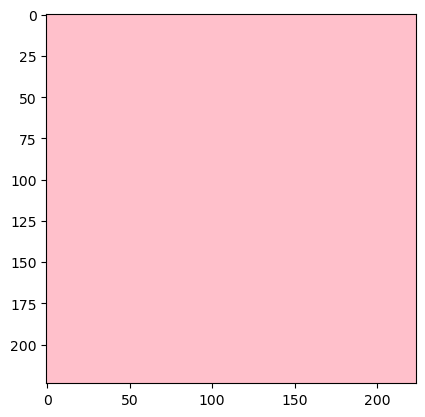

7 Green 8003.png


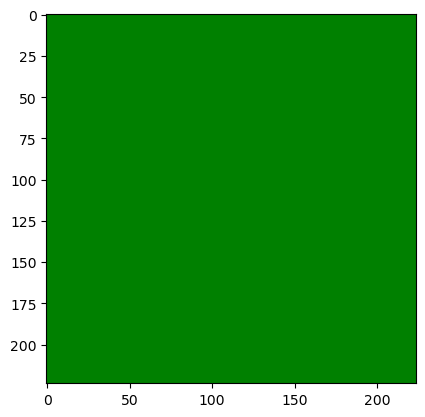

3 White 5745.png


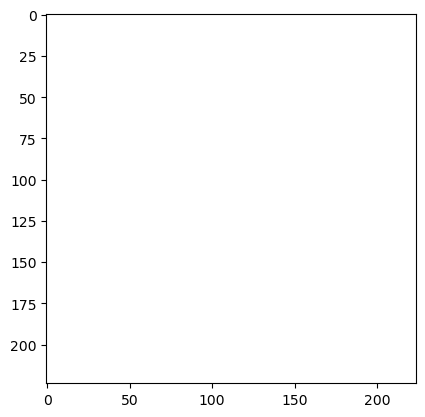

2 Orange 7530.png


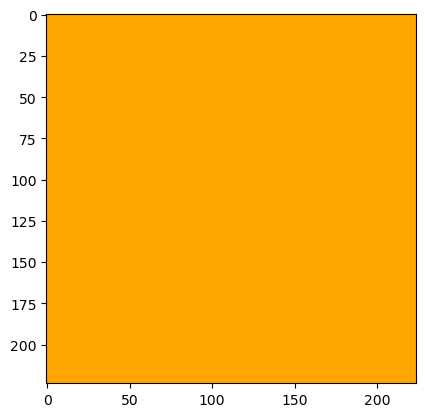

9 Yellow 6779.png


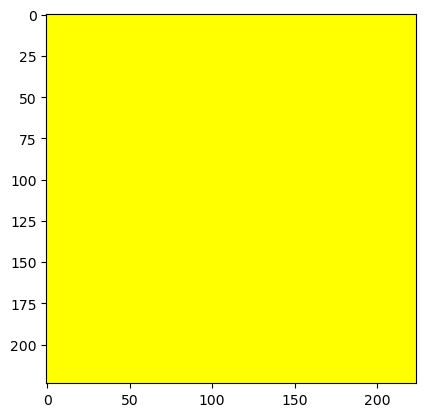

4 Blue 2060.png


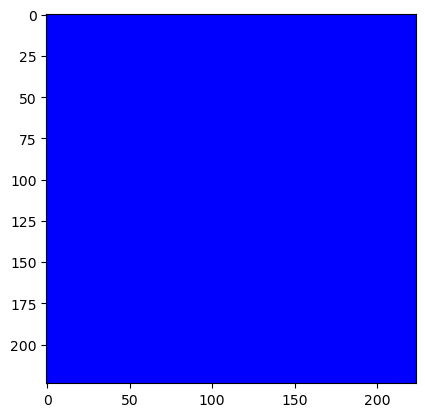

5 Black 8043.png


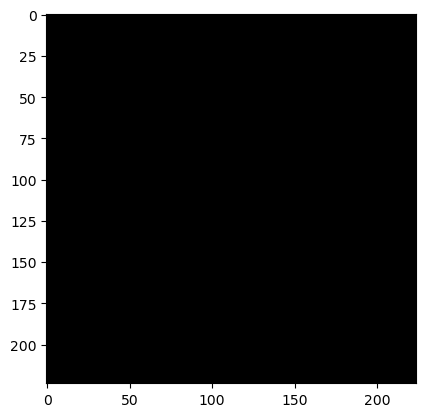

0 Gray 3601.png


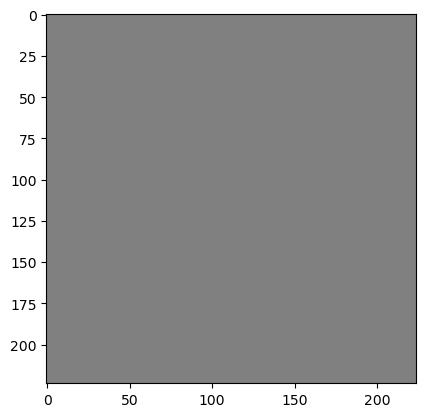

6 Red 3648.png


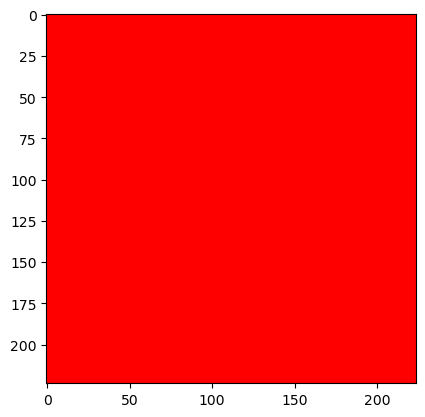

1 Purple 3957.png


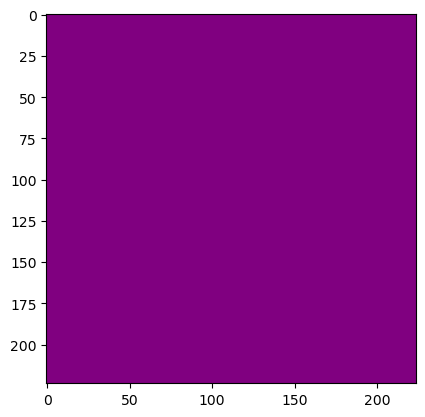

In [23]:
for i in groups.keys():
    print(i, colorkeys[i], groups[i][0])
    img = load_img(path+groups[i][0], target_size=(224,224))
    plt.imshow(img)
    plt.show()

In [24]:
newpredictedclassdf = predictedclassdf
newpredictedclassdf

,name,color
0,7964.png,8
1,6384.png,8
2,5252.png,8
3,5320.png,8
4,5204.png,8
...,...,...
8185,3038.png,1
8186,733.png,1
8187,2904.png,1
8188,7998.png,1


In [25]:
newpredictedclassdf['color'] = newpredictedclassdf['color'].replace(colorkeys)
newpredictedclassdf

,name,color
0,7964.png,Pink
1,6384.png,Pink
2,5252.png,Pink
3,5320.png,Pink
4,5204.png,Pink
...,...,...
8185,3038.png,Purple
8186,733.png,Purple
8187,2904.png,Purple
8188,7998.png,Purple


In [26]:
import ast
test_list = [ast.literal_eval(s.replace('.png', '')) for s in newpredictedclassdf.name.to_list()]
test_list

[7964,
 6384,
 5252,
 5320,
 5204,
 9248,
 7622,
 9892,
 1585,
 8435,
 4855,
 1444,
 488,
 4810,
 9445,
 6869,
 1762,
 3977,
 8962,
 1891,
 2619,
 9294,
 9272,
 61,
 8446,
 8650,
 141,
 2045,
 6062,
 7248,
 8118,
 8047,
 9590,
 1286,
 4235,
 8086,
 4541,
 4210,
 6989,
 3224,
 425,
 4976,
 1024,
 7595,
 3113,
 2987,
 6208,
 8197,
 6862,
 539,
 1224,
 2779,
 2681,
 2781,
 6428,
 1601,
 1614,
 3071,
 851,
 5093,
 2921,
 4967,
 2211,
 3761,
 2416,
 5317,
 9681,
 1480,
 3422,
 9723,
 1127,
 9614,
 284,
 8382,
 2306,
 8666,
 5824,
 3118,
 842,
 6703,
 8170,
 8365,
 6486,
 8549,
 9351,
 9422,
 7307,
 3242,
 6833,
 2809,
 1192,
 7341,
 4110,
 3572,
 3782,
 3880,
 9819,
 8652,
 7704,
 250,
 5595,
 3510,
 9325,
 2189,
 2741,
 6063,
 1211,
 8291,
 4218,
 4446,
 3729,
 4616,
 1210,
 859,
 5985,
 1231,
 1239,
 6657,
 1490,
 5161,
 8084,
 3545,
 8986,
 1412,
 8564,
 2278,
 3689,
 5044,
 2609,
 2859,
 8647,
 9148,
 9298,
 6986,
 6670,
 3965,
 8888,
 7807,
 9419,
 2341,
 7270,
 2849,
 3907,
 3240,
 76

In [41]:
Ground_Truth = pd.read_csv("/home/randd/Desktop/Desktop_Office/2024/February2024/FirstWeek/ActiveLearning/segregated_files/df.csv")
Ground_Truth = Ground_Truth[Ground_Truth["name"].isin(test_list)]
Ground_Truth = Ground_Truth.drop(columns=["Unnamed: 0"])
Ground_Truth

,name,color
0,0,yellow
2,2,gray
3,3,orange
4,4,white
5,5,orange
...,...,...
9995,9995,blue
9996,9996,gray
9997,9997,white
9998,9998,gray


6 : "Red",
8 : "Pink",
4 : "Blue",
2 : "Orange",
5 : "Black",
7 : "Green",
3 : "White",
0 : "Gray",
1 : "Purple",
9 : "Yellow"

In [42]:
colorvals = {"Red" : 6,
"Pink" : 8,
"Blue" : 4,
"Orange" : 2,
"Black" : 5,
"Green" : 7,
"White" : 3,
"Gray" : 0,
"Purple" : 1,
"Yellow": 9,
"red" : 6,
"pink" : 8,
"blue" : 4,
"orange" : 2,
"black" : 5,
"green" : 7,
"white" : 3,
"gray" : 0,
"purple" : 1,
"yellow": 9}

In [43]:
from sklearn.metrics import mean_absolute_error

PT = newpredictedclassdf
PT["name"] = test_list
PT = newpredictedclassdf.sort_values(by="name")
GT = Ground_Truth.sort_values(by="name")
# GT = GT[GT["name"].isin(test_list)]
GT["color"], PT["color"] = GT["color"].replace(colorvals), PT["color"].replace(colorvals)


In [44]:
GT

,name,color
0,0,9
2,2,0
3,3,2
4,4,3
5,5,2
...,...,...
9995,9995,4
9996,9996,0
9997,9997,3
9998,9998,0


In [45]:
PT

,name,color
3431,0,9
5743,2,0
2738,3,2
2270,4,3
2685,5,2
...,...,...
4152,9995,4
6152,9996,0
2154,9997,3
6004,9998,0


In [46]:
mae_values = mean_absolute_error(GT, PT, multioutput='raw_values')
for column, mae in zip(GT.columns, mae_values):
    print(f'MAE for column {column}: {mae}')

MAE for column name: 0.0
MAE for column color: 0.0
